In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
dataFile = "Data/GoldPriceData.csv"

goldRateDf = pd.read_csv(dataFile, index_col='Date',parse_dates=True)
goldRateDf.head()

,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
Date,,,,,,,,,,,,
2017-02-06,0.79,0.79,0.76,0.76,0.79,7430.0,7.0,5848.0,7430.0,100.0,0.03,-0.03
2017-02-03,0.79,0.79,0.79,0.79,0.79,310.0,4.0,244.0,310.0,100.0,0.00,0.00
2017-02-02,0.83,0.83,0.83,0.83,0.83,75.0,1.0,62.0,75.0,100.0,0.00,0.00
2017-01-31,0.87,0.87,0.87,0.87,0.87,1050.0,2.0,913.0,1050.0,100.0,0.00,0.00
2017-01-25,0.91,0.91,0.91,0.91,0.91,400.0,1.0,364.0,400.0,100.0,0.00,0.00


In [3]:
print(goldRateDf.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1660 entries, 2017-02-06 to 2009-12-01
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Open                       1660 non-null   float64
 1   High                       1660 non-null   float64
 2   Low                        1660 non-null   float64
 3   Close                      1660 non-null   float64
 4   WAP                        1660 non-null   float64
 5   No. of Shares              1660 non-null   float64
 6   No. of Trades              1660 non-null   float64
 7   Total Turnover             1660 non-null   float64
 8   Deliverable Quantity       1660 non-null   float64
 9   % Deli. Qty to Traded Qty  1660 non-null   float64
 10  Spread H-L                 1660 non-null   float64
 11  Spread C-O                 1660 non-null   float64
dtypes: float64(12)
memory usage: 168.6 KB
None


In [4]:
goldRateDf.dtypes

Open                         float64
High                         float64
Low                          float64
Close                        float64
WAP                          float64
No. of Shares                float64
No. of Trades                float64
Total Turnover               float64
Deliverable Quantity         float64
% Deli. Qty to Traded Qty    float64
Spread H-L                   float64
Spread C-O                   float64
dtype: object

In [5]:
goldRateDf.describe()

,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
count,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1.660000e+03,1660.000000,1660.000000,1660.000000,1660.000000
mean,11.834367,12.174048,11.221578,11.673934,11.688802,101330.338554,122.983735,1.664520e+06,75754.484337,88.678651,0.952470,-0.160434
std,17.169590,17.704607,16.143363,16.837100,16.920058,140560.465729,138.844766,2.938726e+06,96646.348605,16.648158,1.960071,1.342787
min,0.500000,0.520000,0.500000,0.520000,0.000000,1.000000,1.000000,0.000000e+00,1.000000,4.760000,0.000000,-17.150000
25%,1.350000,1.380000,1.320000,1.350000,1.336219,4393.250000,14.000000,7.159500e+03,4300.000000,78.932500,0.040000,-0.150000
50%,5.255000,5.380000,4.950000,5.085000,5.119729,33871.000000,72.500000,1.086300e+05,31095.000000,100.000000,0.180000,0.000000
75%,11.392500,11.940000,11.250000,11.377500,11.451724,153416.750000,185.250000,2.057775e+06,122723.000000,100.000000,0.890000,0.030000
max,84.950000,84.950000,71.500000,74.550000,74.972394,849341.000000,752.000000,2.383048e+07,631381.000000,100.000000,23.300000,14.000000


In [6]:
goldRateDf.columns

Index(['Open', 'High', 'Low', 'Close', 'WAP', 'No. of Shares', 'No. of Trades',
       'Total Turnover', 'Deliverable Quantity', '% Deli. Qty to Traded Qty',
       'Spread H-L', 'Spread C-O'],
      dtype='object')

In [7]:
# columns contain Special Characters and spaces

columns_modified = ['Open', 'High', 'Low', 'Close', 'WAP', 'No_of_Shares', 'No_of_Trades',
       'Total_Turnover', 'Deliverable_Quantity', 'Pct_Deli_Qty_to_Traded_Qty',
       'Spread_H-L', 'Spread_C-O']
goldRateDf.columns = columns_modified

goldRateDf.reindex()

,Open,High,Low,Close,WAP,No_of_Shares,No_of_Trades,Total_Turnover,Deliverable_Quantity,Pct_Deli_Qty_to_Traded_Qty,Spread_H-L,Spread_C-O
Date,,,,,,,,,,,,
2017-02-06,0.79,0.79,0.76,0.76,0.790000,7430.0,7.0,5848.0,7430.0,100.00,0.03,-0.03
2017-02-03,0.79,0.79,0.79,0.79,0.790000,310.0,4.0,244.0,310.0,100.00,0.00,0.00
2017-02-02,0.83,0.83,0.83,0.83,0.830000,75.0,1.0,62.0,75.0,100.00,0.00,0.00
2017-01-31,0.87,0.87,0.87,0.87,0.870000,1050.0,2.0,913.0,1050.0,100.00,0.00,0.00
2017-01-25,0.91,0.91,0.91,0.91,0.910000,400.0,1.0,364.0,400.0,100.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
2009-12-07,65.55,71.00,57.60,65.25,64.071524,42741.0,286.0,2738481.0,14444.0,33.79,13.40,-0.30
2009-12-04,84.95,84.95,66.30,71.95,73.919145,133820.0,430.0,9891860.0,82395.0,61.57,18.65,-13.00
2009-12-03,72.00,72.00,65.20,70.80,71.469977,84551.0,368.0,6042858.0,61676.0,72.95,6.80,-1.20


In [8]:
# Check if any missing values.

#goldRateDf.isnull().values.any()
goldRateDf.isna().sum()

Open                          0
High                          0
Low                           0
Close                         0
WAP                           0
No_of_Shares                  0
No_of_Trades                  0
Total_Turnover                0
Deliverable_Quantity          0
Pct_Deli_Qty_to_Traded_Qty    0
Spread_H-L                    0
Spread_C-O                    0
dtype: int64

In [9]:
# unique
goldRateDf.nunique()

Open                           781
High                           794
Low                            786
Close                          840
WAP                           1427
No_of_Shares                  1518
No_of_Trades                   419
Total_Turnover                1626
Deliverable_Quantity          1513
Pct_Deli_Qty_to_Traded_Qty     677
Spread_H-L                     251
Spread_C-O                     259
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x184142e9d88>,
 'caps': [<matplotlib.lines.Line2D at 0x18414306d88>,
 'boxes': [<matplotlib.lines.Line2D at 0x184142fdb08>],
 'medians': [<matplotlib.lines.Line2D at 0x18414311f88>],
 'fliers': [<matplotlib.lines.Line2D at 0x18414315f88>],
 'means': []}

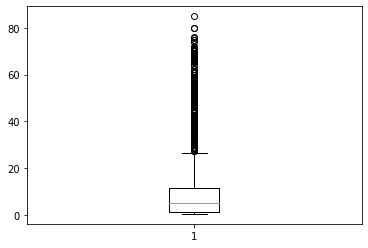

In [10]:
open = goldRateDf['Open']
plt.boxplot(open)

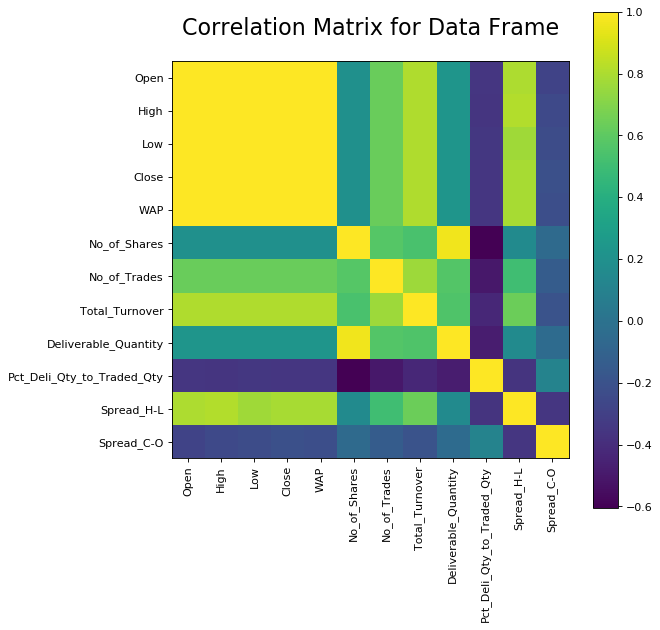

In [13]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = "Data Frame"
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=20)
    plt.show()
    
    
plotCorrelationMatrix(goldRateDf, 8)

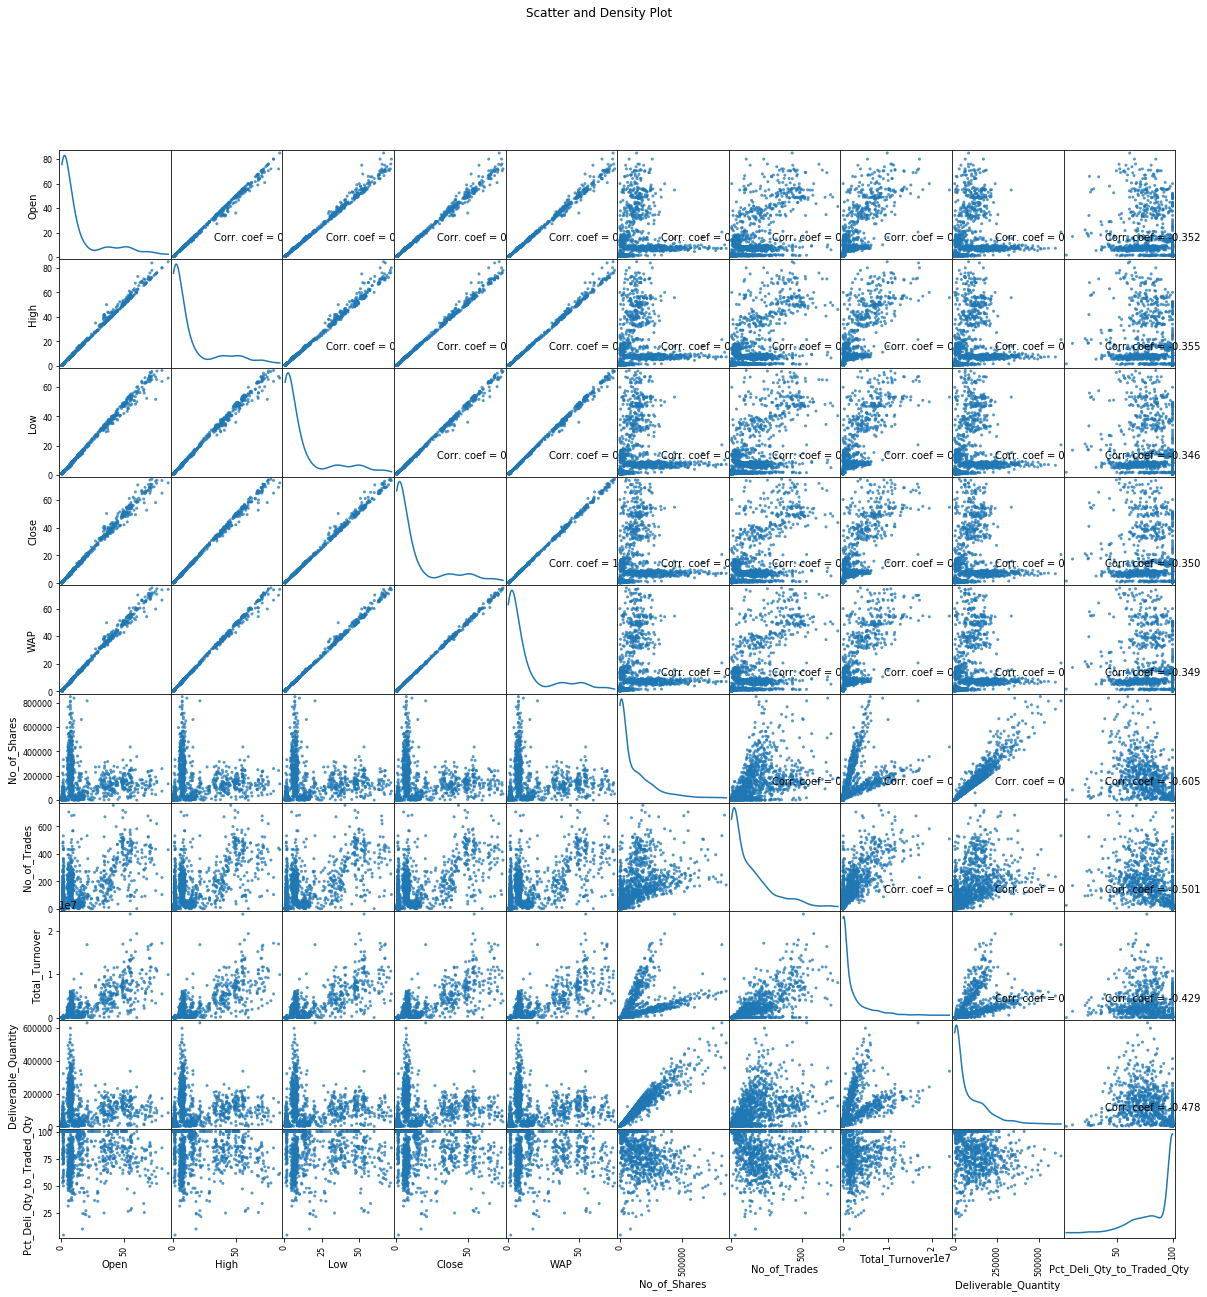

In [19]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()
    
plotScatterMatrix(goldRateDf, 20, 10)

<B> As per the correlation plot above </B> :

1. Looks like the coloumns - 'Open', 'High', 'Low', 'Close', 'WAP' are redundant , hence we should replace all these will single     column

2. Strong positve corelation between - Total_Turnover  vs gold prices, Spread_H-L vs gold prices.

3. Strong negetive correlation between - Pct_Deli_Qty_to_Traded_Qty vs gold prices.

<B> Project statement </B>

1. Fit linear regression model, use Total_Turnover and Spread_H-L as predictor variables and gold prices as target.
   We can use split the current data in to train and test data to measure the performance.
   
2. Hypothesis testing that Pct_Deli_Qty_to_Traded_Qty (share prices) and gold prices are inversely propotional.